In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import sys
import shutil
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import path
from PIL import Image
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
import pandas as pd 

Using TensorFlow backend.
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packag

In [2]:
PATH = 'training'
mask=glob.glob(os.path.join(PATH,'1st_manual','*.jpg'))

In [3]:
i=21
k=-1
for file in mask:
    k+=1
    img = cv2.imread('C:/Users/subah/fcn/training/1st_manual/'+str(i)+'_manual1.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:,:,0] = gray
    img2[:,:,1] = gray
    img2[:,:,2] = gray
    cv2.imwrite('C:/Users/subah/fcn/training/1st_manual/'+str(i)+'_manual1.jpg', img2)
    i+=1

In [4]:
img2.shape

(584, 565, 3)

In [5]:
PATH = 'training'

In [6]:
images=glob.glob(os.path.join(PATH,'images','*.tif'))
mask=glob.glob(os.path.join(PATH,'1st_manual','*.jpg'))
if not os.path.exists('./training/output_images'):
    os.makedirs('./training/output_images')
if not os.path.exists('./training/output_1st_manual'):
    os.makedirs('./training/output_1st_manual')
src = "./training/images/"
dst = "./training/output_images/"
src1= "./training/1st_manual/"
dst1 = "./training/output_1st_manual/"

In [7]:
cropheight=200
cropwidth = 200
k=-1
for file in images:
    k+=1
    im = Image.open(images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

training\images\21_training.tif (0, 0, 200, 200)
training\images\21_training.tif (0, 200, 200, 400)
training\images\21_training.tif (0, 400, 200, 600)
training\images\21_training.tif (200, 0, 400, 200)
training\images\21_training.tif (200, 200, 400, 400)
training\images\21_training.tif (200, 400, 400, 600)
training\images\21_training.tif (400, 0, 600, 200)
training\images\21_training.tif (400, 200, 600, 400)
training\images\21_training.tif (400, 400, 600, 600)
training\images\22_training.tif (0, 0, 200, 200)
training\images\22_training.tif (0, 200, 200, 400)
training\images\22_training.tif (0, 400, 200, 600)
training\images\22_training.tif (200, 0, 400, 200)
training\images\22_training.tif (200, 200, 400, 400)
training\images\22_training.tif (200, 400, 400, 600)
training\images\22_training.tif (400, 0, 600, 200)
training\images\22_training.tif (400, 200, 600, 400)
training\images\22_training.tif (400, 400, 600, 600)
training\images\23_training.tif (0, 0, 200, 200)
training\images\23_tr

training\images\40_training.tif (400, 200, 600, 400)
training\images\40_training.tif (400, 400, 600, 600)


In [8]:
cropheight=200
cropwidth = 200
k=-1
for file in mask:
    k+=1
    im = Image.open(mask[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (mask[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".tif") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

training\1st_manual\21_manual1.jpg (0, 0, 200, 200)
training\1st_manual\21_manual1.jpg (0, 200, 200, 400)
training\1st_manual\21_manual1.jpg (0, 400, 200, 600)
training\1st_manual\21_manual1.jpg (200, 0, 400, 200)
training\1st_manual\21_manual1.jpg (200, 200, 400, 400)
training\1st_manual\21_manual1.jpg (200, 400, 400, 600)
training\1st_manual\21_manual1.jpg (400, 0, 600, 200)
training\1st_manual\21_manual1.jpg (400, 200, 600, 400)
training\1st_manual\21_manual1.jpg (400, 400, 600, 600)
training\1st_manual\22_manual1.jpg (0, 0, 200, 200)
training\1st_manual\22_manual1.jpg (0, 200, 200, 400)
training\1st_manual\22_manual1.jpg (0, 400, 200, 600)
training\1st_manual\22_manual1.jpg (200, 0, 400, 200)
training\1st_manual\22_manual1.jpg (200, 200, 400, 400)
training\1st_manual\22_manual1.jpg (200, 400, 400, 600)
training\1st_manual\22_manual1.jpg (400, 0, 600, 200)
training\1st_manual\22_manual1.jpg (400, 200, 600, 400)
training\1st_manual\22_manual1.jpg (400, 400, 600, 600)
training\1st_man

training\1st_manual\40_manual1.jpg (0, 0, 200, 200)
training\1st_manual\40_manual1.jpg (0, 200, 200, 400)
training\1st_manual\40_manual1.jpg (0, 400, 200, 600)
training\1st_manual\40_manual1.jpg (200, 0, 400, 200)
training\1st_manual\40_manual1.jpg (200, 200, 400, 400)
training\1st_manual\40_manual1.jpg (200, 400, 400, 600)
training\1st_manual\40_manual1.jpg (400, 0, 600, 200)
training\1st_manual\40_manual1.jpg (400, 200, 600, 400)
training\1st_manual\40_manual1.jpg (400, 400, 600, 600)


In [9]:
PATH1 = 'training'

In [10]:
images=glob.glob(os.path.join(PATH1,'output_images','*.tiff'))
mask=glob.glob(os.path.join(PATH1,'output_1st_manual','*.tif'))

In [11]:
def get_data(path, resize_dim=512):
    img=cv2.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [12]:
def get_data_gif(path, resize_dim=512):
    img=plt.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [13]:
orig_images=np.array([get_data(path) for path in images])
orig_images.shape

(180, 512, 512, 3)

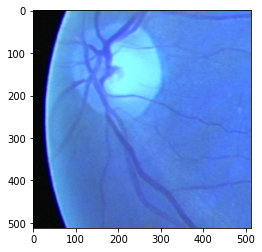

In [14]:
plt.imshow(orig_images[1])

In [15]:
masks=np.array([get_data_gif(path) for path in mask])
masks.shape 

(180, 512, 512, 3)

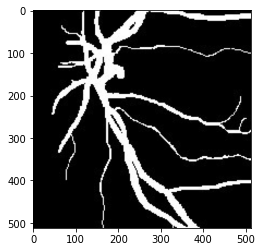

In [16]:
plt.imshow(masks[1])

In [17]:
masks.shape, orig_images.shape

((180, 512, 512, 3), (180, 512, 512, 3))

In [18]:
orig_images = orig_images / 255
masks = masks / 255

In [19]:
VGG_Weights_path = "C:/Users/subah/fcn/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"


In [20]:
n_classes=3

In [21]:
def FCN8( nClasses ,  input_height=512, input_width=512):
    ## input_height and width must be devisible by 32 because maxpooling with filter size = (2,2) is operated 5 times,
    ## which makes the input_height and width 2^5 = 32 times smaller
    assert input_height%32 == 0
    assert input_width%32 == 0
    IMAGE_ORDERING =  "channels_last" 

    img_input = Input(shape=(input_height,input_width, 3)) ## Assume 512,512,3
    
    ## Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', data_format=IMAGE_ORDERING )(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool', data_format=IMAGE_ORDERING )(x)
    f1 = x
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool', data_format=IMAGE_ORDERING )(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool', data_format=IMAGE_ORDERING )(x)
    pool3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3', data_format=IMAGE_ORDERING )(x)
    pool4 = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool', data_format=IMAGE_ORDERING )(x)## (None, 14, 14, 512) 

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1', data_format=IMAGE_ORDERING )(pool4)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3', data_format=IMAGE_ORDERING )(x)
    pool5 = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool', data_format=IMAGE_ORDERING )(x)## (None, 7, 7, 512)

    #x = Flatten(name='flatten')(x)
    #x = Dense(4096, activation='relu', name='fc1')(x)
    # <--> o = ( Conv2D( 4096 , ( 7 , 7 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(4096, activation='relu', name='fc2')(x)
    # <--> o = ( Conv2D( 4096 , ( 1 , 1 ) , activation='relu' , padding='same', data_format=IMAGE_ORDERING))(o)   
    # assuming that the input_height = input_width = 224 as in VGG data
    
    #x = Dense(1000 , activation='softmax', name='predictions')(x)
    # <--> o = ( Conv2D( nClasses ,  ( 1 , 1 ) ,kernel_initializer='he_normal' , data_format=IMAGE_ORDERING))(o)
    # assuming that the input_height = input_width = 224 as in VGG data
    
    
    vgg  = Model(  img_input , pool5  )
    vgg.load_weights(VGG_Weights_path) ## loading VGG weights for the encoder parts of FCN8
    
    n = 4096
    o = ( Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6", data_format=IMAGE_ORDERING))(pool5)
    conv7 = ( Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7", data_format=IMAGE_ORDERING))(o)
    
    
    ## 4 times upsamping for pool4 layer
    conv7_4 = Conv2DTranspose( nClasses , kernel_size=(4,4) ,  strides=(4,4) , use_bias=False, data_format=IMAGE_ORDERING )(conv7)
    ## (None, 512, 512, 10)
    ## 2 times upsampling for pool411
    pool411 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool4_11", data_format=IMAGE_ORDERING))(pool4)
    pool411_2 = (Conv2DTranspose( nClasses , kernel_size=(2,2) ,  strides=(2,2) , use_bias=False, data_format=IMAGE_ORDERING ))(pool411)
    
    pool311 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool3_11", data_format=IMAGE_ORDERING))(pool3)
        
    o = Add(name="add")([pool411_2, pool311, conv7_4 ])
    o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False, data_format=IMAGE_ORDERING )(o)
    o = (Activation('softmax'))(o)
    
    model = Model(img_input, o)

    return model

model = FCN8(nClasses     = n_classes,  
             input_height = 512, 
             input_width  = 512)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 512, 512, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 256, 256, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [22]:
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(orig_images, masks, epochs = 10, batch_size= 16 , shuffle = True, validation_split = 0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 162 samples, validate on 18 samples
Epoch 1/10
162/162 [==============================] - 500s 3s/step - loss: 0.4672 - accuracy: 0.7542 - val_loss: 0.4576 - val_accuracy: 0.7731
Epoch 2/10
162/162 [==============================] - 499s 3s/step - loss: 0.4615 - accuracy: 0.7639 - val_loss: 0.4576 - val_accuracy: 0.7731
Epoch 3/10
162/162 [==============================] - 509s 3s/step - loss: 0.4615 - accuracy: 0.7639 - val_loss: 0.4576 - val_accuracy: 0.7731
Epoch 4/10
162/162 [==============================] - 503s 3s/step - loss: 0.4615 - accuracy: 0.7639 - val_loss: 0.4576 - val_accuracy: 0.7731
Epoch 5/10
162/162 [==============================] - 508s 3s/step - loss: 0.4615 - accuracy: 0.7639 - val_loss: 0.4576 - val_accuracy: 0.7731
Epoch 6/10
162/162 [==============================] - 515s 3s/step - loss: 0.4615 - accuracy: 0.7639 - val_loss: 0.4576 - val_accuracy: 0.7731
Epo

In [23]:
PATH2 = 'test'

In [24]:
t_images=glob.glob(os.path.join(PATH2,'images','*.tif'))

In [25]:
if not os.path.exists('./test/output_images'):
    os.makedirs('./test/output_images')
src = "./test/images/"
dst = "./test/output_images/"

In [26]:
cropheight=200
cropwidth = 200
k=-1
for file in t_images:
    k+=1
    im = Image.open(t_images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

test\images\01_test.tif (0, 0, 200, 200)
test\images\01_test.tif (0, 200, 200, 400)
test\images\01_test.tif (0, 400, 200, 600)
test\images\01_test.tif (200, 0, 400, 200)
test\images\01_test.tif (200, 200, 400, 400)
test\images\01_test.tif (200, 400, 400, 600)
test\images\01_test.tif (400, 0, 600, 200)
test\images\01_test.tif (400, 200, 600, 400)
test\images\01_test.tif (400, 400, 600, 600)
test\images\02_test.tif (0, 0, 200, 200)
test\images\02_test.tif (0, 200, 200, 400)
test\images\02_test.tif (0, 400, 200, 600)
test\images\02_test.tif (200, 0, 400, 200)
test\images\02_test.tif (200, 200, 400, 400)
test\images\02_test.tif (200, 400, 400, 600)
test\images\02_test.tif (400, 0, 600, 200)
test\images\02_test.tif (400, 200, 600, 400)
test\images\02_test.tif (400, 400, 600, 600)
test\images\03_test.tif (0, 0, 200, 200)
test\images\03_test.tif (0, 200, 200, 400)
test\images\03_test.tif (0, 400, 200, 600)
test\images\03_test.tif (200, 0, 400, 200)
test\images\03_test.tif (200, 200, 400, 400)

In [27]:
PATH3 = 'test'

In [28]:
t_images=glob.glob(os.path.join(PATH3,'output_images','*.tiff'))

In [29]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(180, 512, 512, 3)

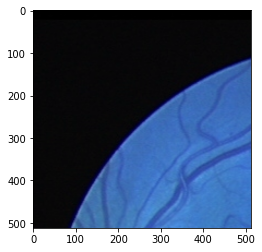

In [30]:
plt.imshow(test_images[0])

In [31]:
test_images.shape

(180, 512, 512, 3)

In [32]:
test_images = test_images / 255

In [1]:
imgs_mask_test = model.predict(test_images, verbose=1)

NameError: name 'model' is not defined

In [ ]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

In [ ]:
plt.imshow(imgs_mask_test[1], cmap='gray')

In [ ]:
plt.imshow(i, cmap='gray')

In [ ]:
yp = np.round(imgs_mask_test,0)

In [ ]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

In [ ]:
plt.imshow(i, cmap='gray')